# Summer Olympics Medals (1976-2008)
#### A Brief history of medals won at the Summer Olympics since 1976 - 2008
## by (Aalaa Dewan)

## Preliminary Wrangling

> This dataset is a list of all the medal winners in the Summer Olympics from 1976 Montreal to 2008 Beijing. It includes each and every medal awarded within the period. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import seaborn as sb
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
from collections import OrderedDict

cmaps = OrderedDict()

%matplotlib inline

In [2]:
# load in the dataset into pandas DF, display first 5 rows
df = pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv', encoding='latin-1')
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.info())

(15433, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB
None


In [4]:
# display null values in df
df[df.isnull().any(axis=1)]

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# drop null records / check
df.dropna(axis=0, inplace=True)
df.shape

(15316, 11)

In [6]:
# since all of the datasets values are categories so I need counter
# add 'count' column and set all values to 1
df['Count'] = 1

In [7]:
# convert gender into categorical data type
df["Gender"] = df["Gender"].astype("category")

In [8]:
# convert medal into ordered categorical data type
medal_color = ['Bronze', 'Silver', 'Gold']
medals = pd.api.types.CategoricalDtype(ordered=True, categories=medal_color)
df['Medal'] = df['Medal'].astype(medals)

In [9]:
# convert the marathon's year into object data type
df['Year'] = df['Year'].astype(str)
df['Year'] = df['Year'].str.extract('(\d{,4})')

In [10]:
# convert medal into ordered categorical data type
year_order = ['1976', '1980', '1984', '1988', '1992', '1996', '2000', '2004', '2008']
years = pd.api.types.CategoricalDtype(ordered=True, categories=year_order)
df['Year'] = df['Year'].astype(years)

In [11]:
df['Year'].value_counts()

2008    2042
2000    2015
2004    1998
1996    1859
1992    1705
1988    1546
1984    1459
1980    1387
1976    1305
Name: Year, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15316 entries, 0 to 15432
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   City          15316 non-null  object  
 1   Year          15316 non-null  category
 2   Sport         15316 non-null  object  
 3   Discipline    15316 non-null  object  
 4   Event         15316 non-null  object  
 5   Athlete       15316 non-null  object  
 6   Gender        15316 non-null  category
 7   Country_Code  15316 non-null  object  
 8   Country       15316 non-null  object  
 9   Event_gender  15316 non-null  object  
 10  Medal         15316 non-null  category
 11  Count         15316 non-null  int64   
dtypes: category(3), int64(1), object(8)
memory usage: 1.2+ MB


### What is the structure of your dataset?

There are 15,316 records in the dataset with 11 features (city, year, sport, discipline, event, athlete, gender, country_code, country, event_gender, medal). Most variables are categorical in nature, the variable medal is ordered factor variable with the following levels.
(worst) ——> (best)
Bronze, Silver, Gold

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring athletes contribution in Olympics through years and mainly comparing the diffrences in participation between women and men.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I will dig deeper in exploring countries such as Egypt to figure the percent of medals awarded to women and men athletes, and I will review the percent of Arab/Middle-Eastern Athletes participation against the rest of world countries. And I'll inspect more in some sports as (Tennis & Weightlifting) as I/ve personal interest in them.

## Univariate Exploration

> In this section, I'll explore athletes participation, awarded medals, 
most played sports, and most countries contributed in olympics

In [13]:
# display df
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,Count
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver,1
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze,1
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold,1
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver,1
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze,1


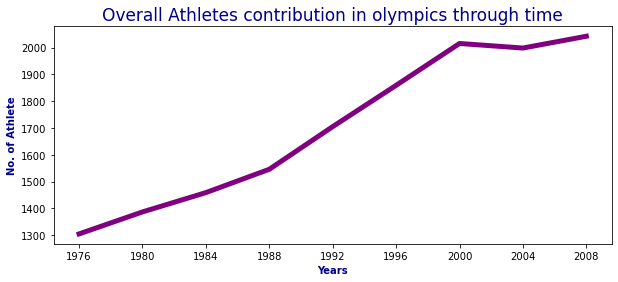

In [14]:
# contribution in olympics through time 
plt.figure(figsize=(10, 4))
df.groupby('Year')['Count'].size().plot.line(color='purple', linewidth=5.0)
plt.title('Overall Athletes contribution in olympics through time', fontsize=17, color='darkblue')
plt.xlabel('Years', fontweight='bold', color='darkblue')
plt.ylabel('No. of Athlete', fontweight='bold', color='darkblue')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], ['1976', '1980', '1984', '1988', '1992', '1996', '2000', '2004', '2008']);

> It's obvious that the athletes participation rapidly increasing through years, specially from 1988 to 2000.

Text(0.5, 1.0, 'Overall Athletes contribution in olympics through the time ')

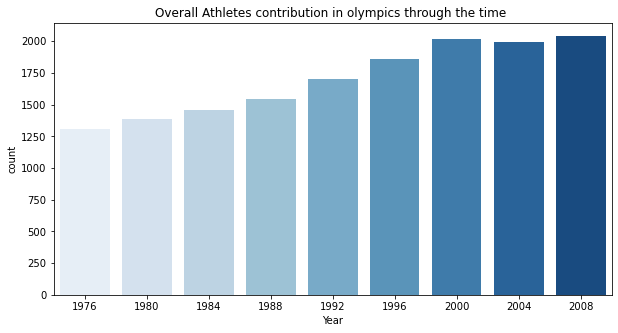

In [15]:
# plot Athletes contribution in olympics through time 
plt.figure(figsize=(10, 5))
sb.countplot(df['Year'], palette=sb.color_palette("Blues", 9))
plt.title('Overall Athletes contribution in olympics through the time ')

In [16]:
# disply counts of medals
df['Medal'].value_counts()

Bronze    5258
Gold      5042
Silver    5016
Name: Medal, dtype: int64

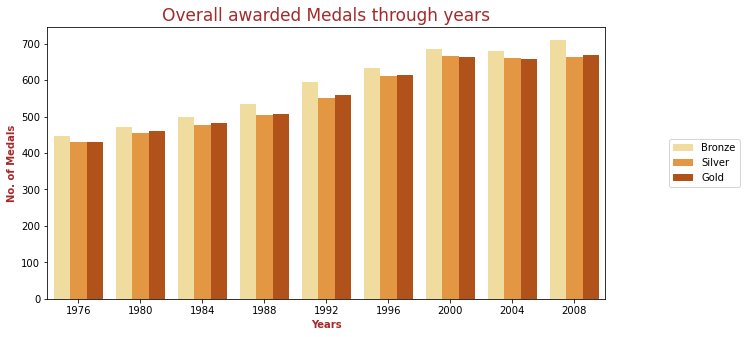

In [17]:
# plot awarded medals through years
plt.figure(figsize=(10, 5))
sb.countplot(data=df, x='Year', hue='Medal', palette=sb.color_palette("YlOrBr", 3))
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Overall awarded Medals through years', fontsize=17, color='brown')
plt.xlabel('Years', fontweight='bold', color='brown')
plt.ylabel('No. of Medals', fontweight='bold', color='brown');

> It seems that count of awarded (Bronze, Silver, Gold) Medals are almost the same.

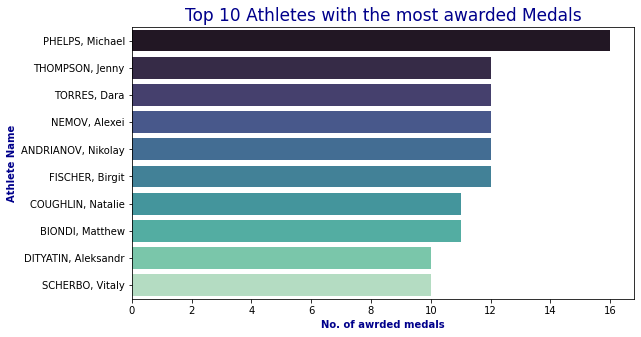

In [18]:
# clculate the counts of awrded medals for atheletes 
athlete_order = df['Athlete'].value_counts().head(10).index

# plot top 10 awarded Athletes
plt.figure(figsize=(9, 5))
sb.countplot(data=df, y='Athlete', order=athlete_order, palette=sb.color_palette('mako', 10))
plt.title('Top 10 Athletes with the most awarded Medals', fontsize=17, color='darkblue')
plt.xlabel('No. of awrded medals', fontweight='bold', color='darkblue')
plt.ylabel('Athlete Name', fontweight='bold', color='darkblue');

> "Micheal Phelps" is the most awarded athlete in olympics lifetime with 16 medals.

In [19]:
df['Country'].value_counts()

United States           1992
Soviet Union            1021
Australia                798
Germany                  691
China                    679
                        ... 
Burundi                    1
United Arab Emirates       1
Uruguay                    1
Virgin Islands*            1
Sudan                      1
Name: Country, Length: 127, dtype: int64

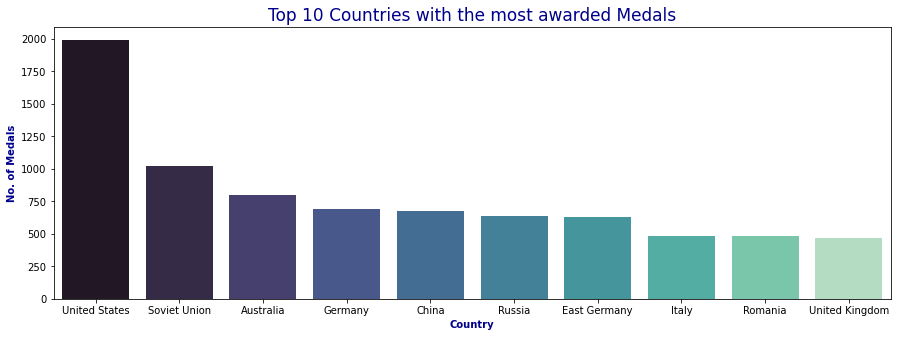

In [20]:
# plot countries of the top 10 rewarded medals
plt.figure(figsize=(15, 5))
highest_country = df['Country'].value_counts().head(10).index
sb.countplot(data=df, x='Country', order=highest_country, palette=sb.color_palette("mako", 10))
plt.title('Top 10 Countries with the most awarded Medals', fontsize=17, color='darkblue')
plt.xlabel('Country', fontweight='bold', color='darkblue')
plt.ylabel('No. of Medals', fontweight='bold', color='darkblue');

> "United States" is in the first place in olympics lifetime with nearly 2000 medals awarded, thereafter "Soviet Union" in the second place with 1000 awarded medals.

In [21]:
df['Sport'].value_counts()

Aquatics             2210
Athletics            1523
Rowing               1377
Hockey                817
Gymnastics            783
Handball              780
Volleyball            695
Canoe / Kayak         672
Football              669
Basketball            646
Fencing               606
Wrestling             533
Cycling               483
Equestrian            423
Sailing               417
Boxing                416
Judo                  396
Shooting              345
Baseball              335
Weightlifting         311
Softball              180
Archery               162
Table Tennis          120
Badminton             120
Tennis                118
Modern Pentathlon      81
Taekwondo              80
Triathlon              18
Name: Sport, dtype: int64

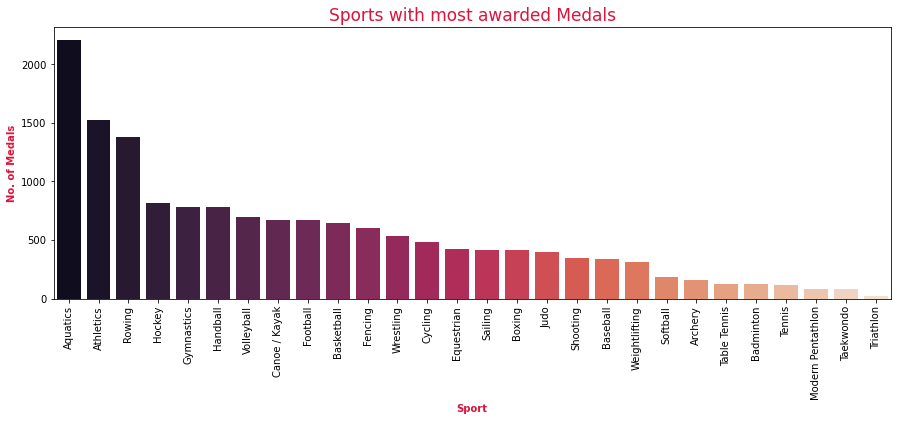

In [22]:
# plot sports with most awarded Medals 
plt.figure(figsize=(15, 5))
highest_sport = df['Sport'].value_counts().index
sb.countplot(data=df, x='Sport', order=highest_sport, palette=sb.color_palette("rocket", 28))
plt.xticks(rotation=90)
plt.title('Sports with most awarded Medals', fontsize=17, color='crimson')
plt.xlabel('Sport', fontweight='bold', color='crimson')
plt.ylabel('No. of Medals', fontweight='bold', color='crimson');

> It seems that a huge number of athletes likes "Aquatics", comes after it "Athletics" with nearly less than it by 600 medals awarded.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Everything seems normal contribution in olympics increases overtime, maybe it's due to the increase of population over world or because people become more interesting in sports.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> "United States" awarded medals are more than "Soviet Union" by nearly 1000 medals awarded. It's really huge diffrence between the first 2 places, but may be it's due to the population in US is the largest in the world. (I don't know and no data available here to investegate more at this point)

## Bivariate Exploration

> In this section I'll compare the overall contribution of women/men in olympics through years, then I'll 
focus on their proportion in Egypt, at last I'll explore my 2 favourite sports(Tennis & Weightlifting)

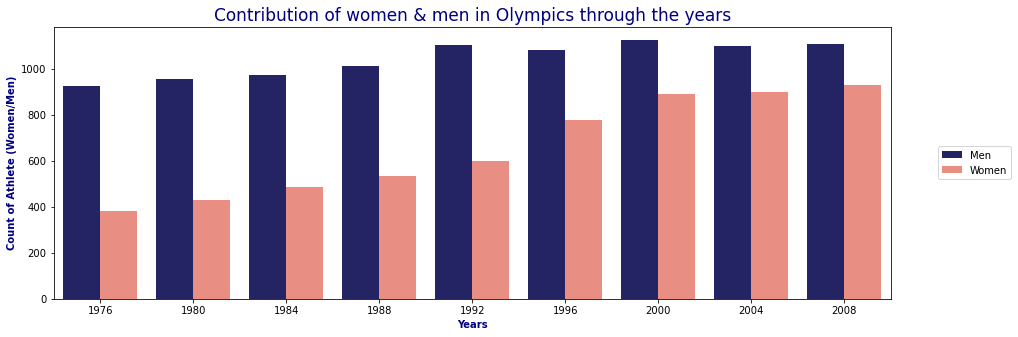

In [23]:
# contribution of women & men through the years
plt.figure(figsize=(15, 5))
sb.countplot(data=df, x='Year', hue='Gender', palette=['midnightblue', 'salmon'])
plt.legend(loc='center right', bbox_to_anchor=(1.15, 0.5), ncol=1)
plt.title('Contribution of women & men in Olympics through the years', fontsize=17, color='navy')
plt.xlabel('Years', fontweight='bold', color='navy')
plt.ylabel("Count of Athlete (Women/Men)", fontweight='bold', color='navy');

> Men's participation in Olympics has slightly increase through years, but women really did it, they have amazing level of increasing. 

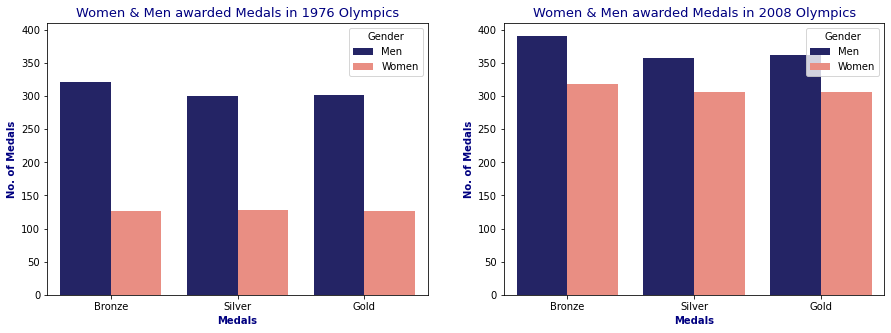

In [24]:
# contrast between women & men awarded medals in 1976 and 2008
plt.figure(figsize = [15, 5]) 

# plot Women & Men awarded Medals in 1976 Olympics
ax1 = plt.subplot(1, 2, 1)
sb.countplot(data=df.query('Year == "1976"'), x='Medal', hue='Gender', palette=['midnightblue', 'salmon'])
ax1.set_title('Women & Men awarded Medals in 1976 Olympics', fontsize=13, color='navy')
ax1.set_xlabel('Medals', fontweight='bold', color='navy')
ax1.set_ylabel('No. of Medals', fontweight='bold', color='navy')

# plot Women & Men awarded Medals in 2008 Olympics
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
sb.countplot(data=df.query('Year == "2008"'), x='Medal', hue='Gender', palette=['midnightblue', 'salmon'])
ax2.set_title('Women & Men awarded Medals in 2008 Olympics', fontsize=13, color='navy')
ax2.set_xlabel('Medals', fontweight='bold', color='navy')
ax2.set_ylabel('No. of Medals', fontweight='bold', color='navy');

> Now it's clear that women's contribution really increased in amazing way, 
they awarded medals in 2008 double the awarded in 1976.

In [25]:
# create df for Egypt
Egypt = df[df['Country'] == 'Egypt']

In [26]:
Egypt['Gender'].value_counts()

Men      7
Women    0
Name: Gender, dtype: int64

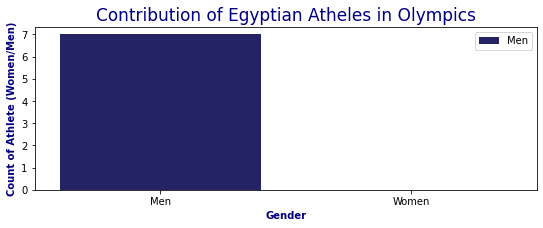

In [27]:
# plot contribution of athletes from Egypt
plt.figure(figsize=(9, 3))
sb.countplot(data=Egypt,  x='Gender', palette=['midnightblue', 'salmon'])
plt.legend(labels=['Men', 'Women'])
plt.title('Contribution of Egyptian Atheles in Olympics', fontsize=17, color='navy')
plt.xlabel('Gender', fontweight='bold', color='navy')
plt.ylabel("Count of Athlete (Women/Men)", fontweight='bold', color='navy');

> Egyptian women contribution is ZERO!!!!

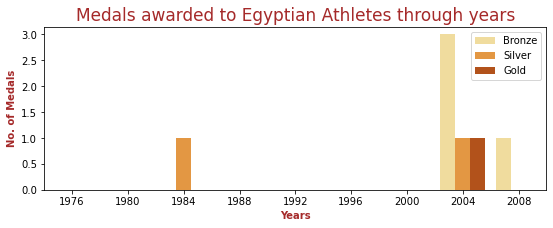

In [28]:
# plot Medals awrded to Egyptian Athletes through years
plt.figure(figsize=(9, 3))
sb.countplot(data=Egypt, x='Year', hue='Medal', palette=sb.color_palette("YlOrBr", 3))
plt.legend(loc='upper right')

plt.title('Medals awarded to Egyptian Athletes through years', fontsize=17, color='brown')
plt.xlabel('Years', fontweight='bold', color='brown')
plt.ylabel('No. of Medals', fontweight='bold', color='brown');

> Egyptian athletes were awarded only 1 medal in first 7 years then they reach their peak in 2004 with 5 medals and recede in 2008 with only 1 medal. 

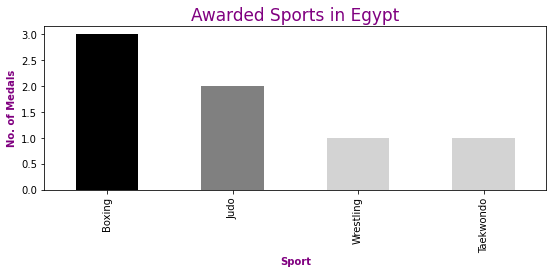

In [29]:
# plot the awarded sports
Egypt.groupby('Sport')['Medal'].count().sort_values(ascending=False).plot(kind='bar', figsize=(9, 3), 
                                            color=['black', 'grey', 'lightgray', 'lightgray'])
plt.title('Awarded Sports in Egypt', fontsize=17, color='purple')
plt.xlabel('Sport', fontweight='bold', color='purple')
plt.ylabel('No. of Medals', fontweight='bold', color='purple');

> Egyptian athletes awarded medals in (Boxing, Judo, Wrestling, Taekwondo).

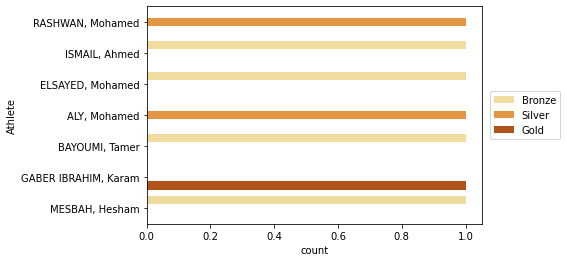

In [30]:
# plot awarded Egyptian athlete
sb.countplot(data=Egypt, y='Athlete', hue='Medal', palette=sb.color_palette("YlOrBr", 3))
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

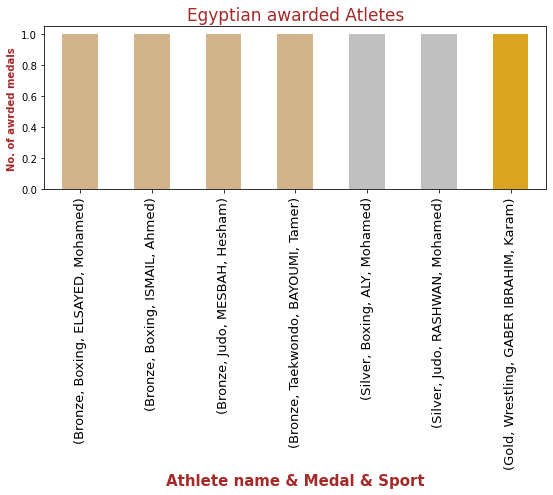

In [31]:
# plot Egyptian athletes and corresponding sport
Egypt.groupby(['Medal', 'Sport'])['Athlete'].value_counts().plot(kind='bar', figsize=(9, 3), 
                            color=['tan', 'tan', 'tan', 'tan', 'silver', 'silver', 'goldenrod'])
plt.title('Egyptian awarded Atletes', fontsize=17, color='brown')
plt.tick_params(axis='x', labelsize=13)
plt.xlabel('Athlete name & Medal & Sport', fontweight='bold', fontsize=15, color='brown')
plt.ylabel('No. of awrded medals', fontweight='bold', color='brown');

> The only Golden awarded medal was to "Karam Gaber" in Wrestling.

In [32]:
# create df for tennis sport
Tennis = df[df['Sport'] == 'Tennis']

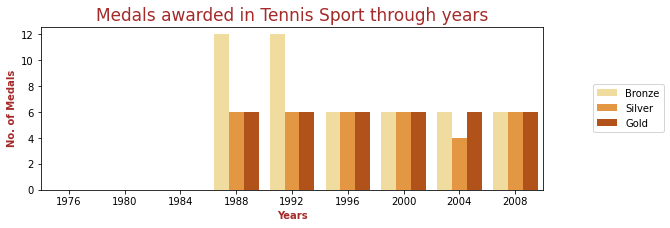

In [33]:
# plot medals awarded in tennis through time
plt.figure(figsize=(9, 3));
sb.countplot(data=Tennis, x='Year', hue='Medal', palette=sb.color_palette("YlOrBr", 3))
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Medals awarded in Tennis Sport through years', fontsize=17, color='brown')
plt.xlabel('Years', fontweight='bold', color='brown')
plt.ylabel('No. of Medals', fontweight='bold', color='brown');


> 1988 was the first year to play Tennis in olympics.

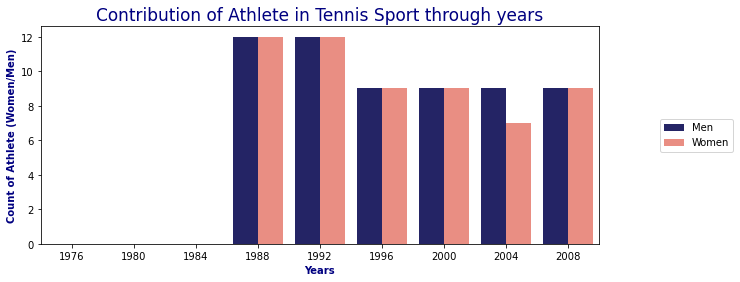

In [34]:
# plot Contribution of Athlete in Tennis 
plt.figure(figsize=(10, 4));
sb.countplot(data=Tennis, x='Year', hue='Gender', palette=['midnightblue', 'salmon'])
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Contribution of Athlete in Tennis Sport through years', fontsize=17, color='navy')
plt.xlabel('Years', fontweight='bold', color='navy')
plt.ylabel("Count of Athlete (Women/Men)", fontweight='bold', color='navy');

> It's obvious that the performance of athletes (Women/Men) playing Tennis is nearly the same.

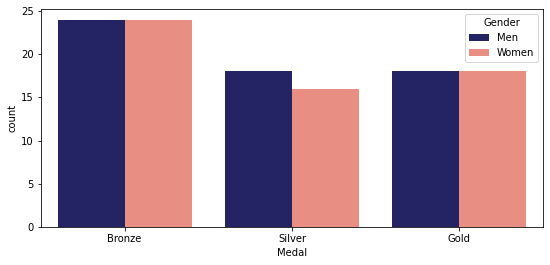

In [35]:
# plot medals awarded to athletes in tennis
plt.figure(figsize=(9, 4));
sb.countplot(data=Tennis, x='Medal', hue='Gender', palette=['midnightblue', 'salmon'])

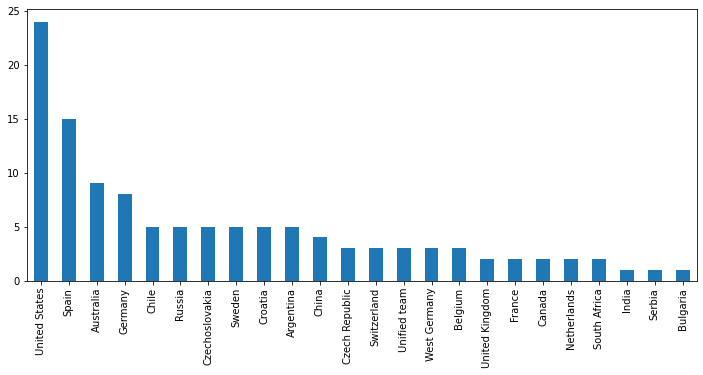

In [36]:
# plot top countries in Tennis
Tennis['Country'].value_counts().plot.bar(figsize=(12, 5))

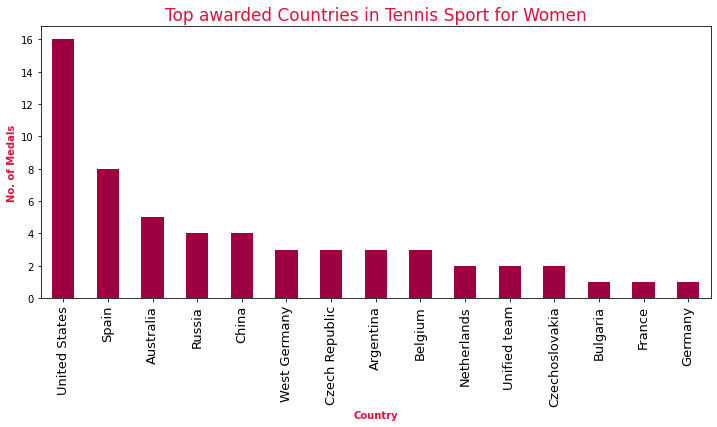

In [37]:
# plot top (women) countries in Tennis
Tennis.query('Gender == "Women"')['Country'].value_counts().plot.bar(figsize=(12, 5), cmap=cm.get_cmap('Spectral'))
plt.title('Top awarded Countries in Tennis Sport for Women', fontsize=17, color='crimson')
plt.tick_params(axis='x', labelsize=13)
plt.xlabel('Country', fontweight='bold', color='crimson')
plt.ylabel('No. of Medals', fontweight='bold', color='crimson');

> US comes in the first place in Tennis for women with 16 medals, then Spain with 8 medals.

In [38]:
# create df for weightlifting sport
Weightlifting = df[df['Sport'] == 'Weightlifting']

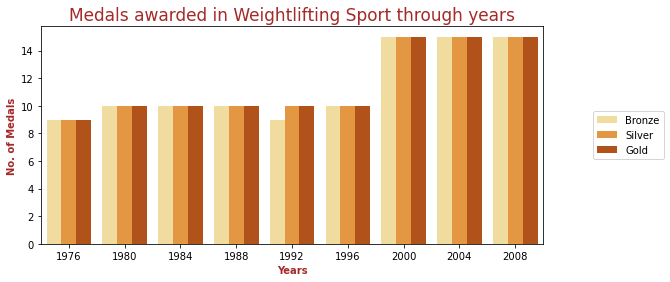

In [39]:
# plot medals awarded in weightlifting through time
plt.figure(figsize=(9, 4))
sb.countplot(data=Weightlifting, x='Year', hue='Medal', palette=sb.color_palette("YlOrBr", 3))
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Medals awarded in Weightlifting Sport through years', fontsize=17, color='brown')
plt.xlabel('Years', fontweight='bold', color='brown')
plt.ylabel('No. of Medals', fontweight='bold', color='brown');

> Medals awarded in Weightlifting were constant from 1976 to 1996, until Weightlifting sport showed up
in 2000 to increase by one third.

In [40]:
Weightlifting.groupby(['Year', 'Gender'])['Medal'].size()

Year  Gender
1976  Men       27
      Women      0
1980  Men       30
      Women      0
1984  Men       30
      Women      0
1988  Men       30
      Women      0
1992  Men       29
      Women      0
1996  Men       30
      Women      0
2000  Men       24
      Women     21
2004  Men       24
      Women     21
2008  Men       24
      Women     21
Name: Medal, dtype: int64

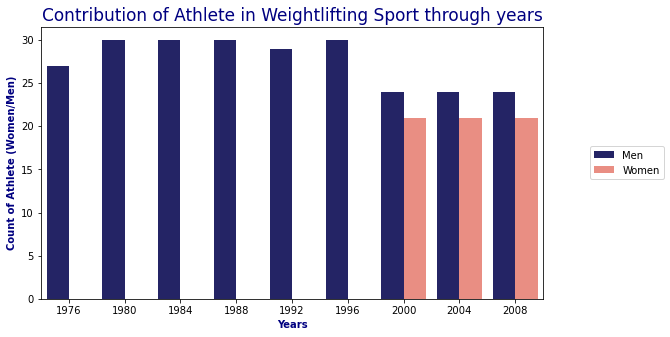

In [41]:
# plot Contribution of Athlete in weightlifting 
plt.figure(figsize=(9, 5))
sb.countplot(data=Weightlifting, x='Year', hue='Gender', palette=['midnightblue', 'salmon'])
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Contribution of Athlete in Weightlifting Sport through years', fontsize=17, color='navy')
plt.xlabel('Years', fontweight='bold', color='navy')
plt.ylabel("Count of Athlete (Women/Men)", fontweight='bold', color='navy');

> Women started to Weightlifting in 2000, but they showed up with number of awarded medals close to the men's awarded number.

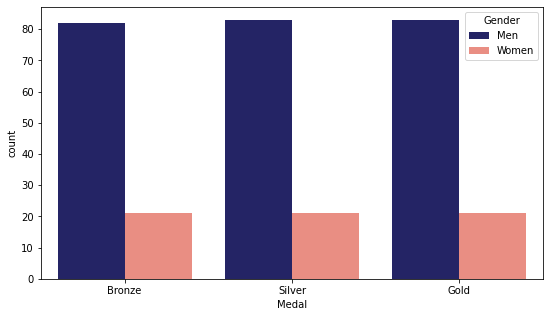

In [42]:
# plot medals awarded to athletes in weightlifting
plt.figure(figsize=(9, 5))
sb.countplot(data=Weightlifting, x='Medal', hue='Gender', palette=['midnightblue', 'salmon'])

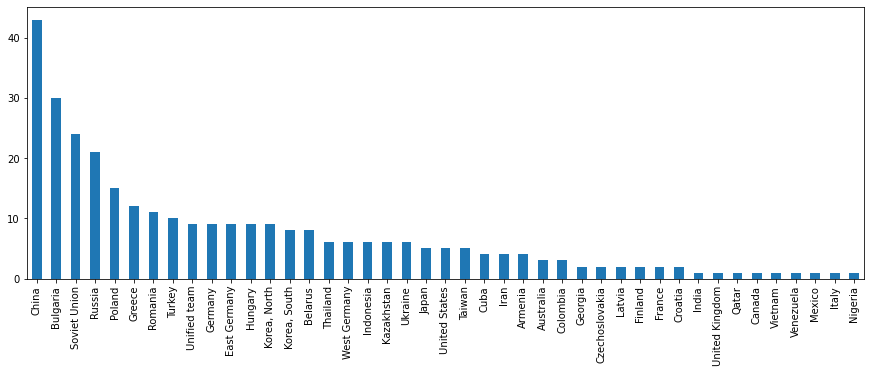

In [43]:
# plot top countries in weightlifting
Weightlifting['Country'].value_counts().plot.bar(figsize=(15, 5))

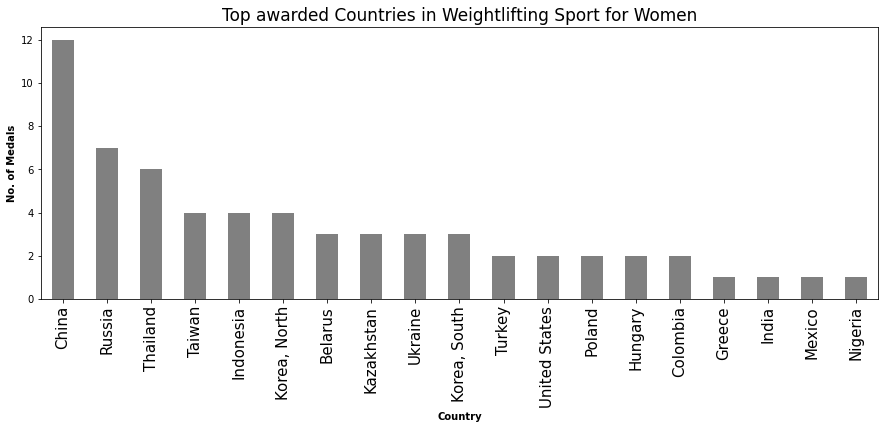

In [44]:
# plot top countries in weightlifting for women
Weightlifting.query('Gender == "Women"')['Country'].value_counts().plot.bar(figsize=(15, 5), color='gray')
plt.title('Top awarded Countries in Weightlifting Sport for Women', fontsize=17)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel('Country', fontweight='bold')
plt.ylabel('No. of Medals', fontweight='bold');

> China comes in the first place in Weightlifting for women with 12 medals, then Russia with 7 medals.

In [45]:
df['Country'].unique()

array(['East Germany', 'Soviet Union', 'United States', 'Italy', 'Sweden',
       'Australia', 'Canada', 'West Germany', 'Netherlands',
       'United Kingdom', 'Hungary', 'Japan', 'Cuba', 'Poland', 'Bulgaria',
       'New Zealand', 'Belgium', 'Mexico', 'Jamaica', 'Finland',
       'Romania', 'Portugal', 'France', 'Brazil', 'Czechoslovakia',
       'Trinidad and Tobago', 'Yugoslavia', 'Venezuela', 'Puerto Rico*',
       'Korea, North', 'Bermuda*', 'Thailand', 'Spain', 'Denmark',
       'Switzerland', 'Pakistan', 'Korea, South', 'Norway', 'Austria',
       'Iran', 'Mongolia', 'Ethiopia', 'Tanzania', 'Guyana', 'Uganda',
       'Ireland', 'India', 'Zimbabwe', 'Greece', 'Lebanon', 'China',
       'Nigeria', 'Kenya', 'Morocco', "Cote d'Ivoire", 'Algeria',
       'Turkey', 'Cameroon', 'Zambia', 'Dominican Republic', 'Iceland',
       'Egypt', 'Colombia', 'Peru', 'Taiwan', 'Syria', 'Costa Rica',
       'Suriname', 'Indonesia', 'Djibouti', 'Senegal', 'Philippines',
       'Netherlands Antilles

In [46]:
# create df for Arab/Middle-Eastern and df for the rest of the countries
arab_middle_east = ['Cyprus', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Saudi Arabia',
'Palestine', 'Qatar', 'Syria', 'Turkey', 'United Arab Emirates', 'Yemen', 'Sudan', 'Tunisia', 'Algeria', 'Morocco']

df1 = df[df['Country'].isin(arab_middle_east)]
df2 = df[~df['Country'].isin(arab_middle_east)]
df3 = df.loc[df['Country'] == 'United States']

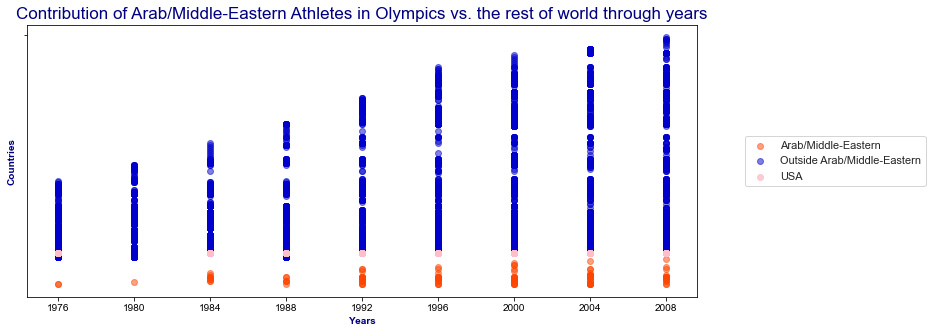

In [47]:
# plot Arab/Middle-Eastern contribution in olympics vs. the rest of countries
plt.figure(figsize=(12, 5))
sb.regplot(data=df1, x= 'Year', y='Country', fit_reg= False, scatter_kws={'alpha':1/2, 'color':'orangered'})
sb.regplot(data=df2, x= 'Year', y='Country', fit_reg= False, scatter_kws={'alpha':1/2, 'color':'mediumblue'})
sb.regplot(data=df3, x= 'Year', y='Country', fit_reg= False, scatter_kws={'color':'pink'})

plt.yticks('')
sb.set(style="whitegrid")
plt.legend(labels=['Arab/Middle-Eastern', 'Outside Arab/Middle-Eastern', 'USA'], loc='center right', bbox_to_anchor=(1.35, 0.5));
plt.title('Contribution of Arab/Middle-Eastern Athletes in Olympics vs. the rest of world through years', fontsize=17, color='navy')
plt.xlabel('Years', fontweight='bold', color='navy')
plt.ylabel('Countries', fontweight='bold', color='navy');

> It's looks that Arab/Middle-Eastern Athletes contribution in Olymics isn't bad. But it seems that USA contribution in 1980 is very low(which I'll investigate in deeper in the future.)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

#### Men's participation in Olympics has slightly increase through years, but women really did it they have amazing level of increasing. They awarded medals in 2008 double the awarded in 1976.
#### It's was really a big shock that Egyptian women participation in Olympics is ZERO!!!!
#### Egyptian athletes were awarded only 1 medal in first 7 years then they reach their peak in 2004 with 5 medals and recede back again in 2008 with only 1 medal.
#### Performance of athletes (Women/Men) playing Tennis is nearly the same.
#### Women started to Weightlifting in 2000, but they showed up with number of awarded medals close to the men's awarded number.
#### Medals awarded in Weightlifting were constant from 1976 to 1996, until Weightlifting sport showed up in 2000 to increase by one third.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
#### It seems that USA Olympics contribution in 1980 is very low. (which I'll investigate in deeper in the future


## Multivariate Exploration

> In this section I'll focus to conclude the overall participation and awarding medals to both athlete women/men.

In [48]:
Gender_Medal = pd.DataFrame(df.groupby(['Year','Medal', 'Gender']).size()).reset_index()
Gender_Medal.columns = ['Year', 'Medal', 'Gender', 'Count']
Gender_Medal.head(3)

,Year,Medal,Gender,Count
0,1976,Bronze,Men,321
1,1976,Bronze,Women,126
2,1976,Silver,Men,301


In [49]:
# create grouped df to count medals awarded to athletes by their categories
Gender_Medal = pd.DataFrame(df.groupby(['Year', 'Gender', 'Medal']).size()).reset_index()
Gender_Medal.columns = ['Year', 'Gender', 'Medal', 'Count']
Gender_Medal.head(3)

,Year,Gender,Medal,Count
0,1976,Men,Bronze,321
1,1976,Men,Silver,301
2,1976,Men,Gold,302


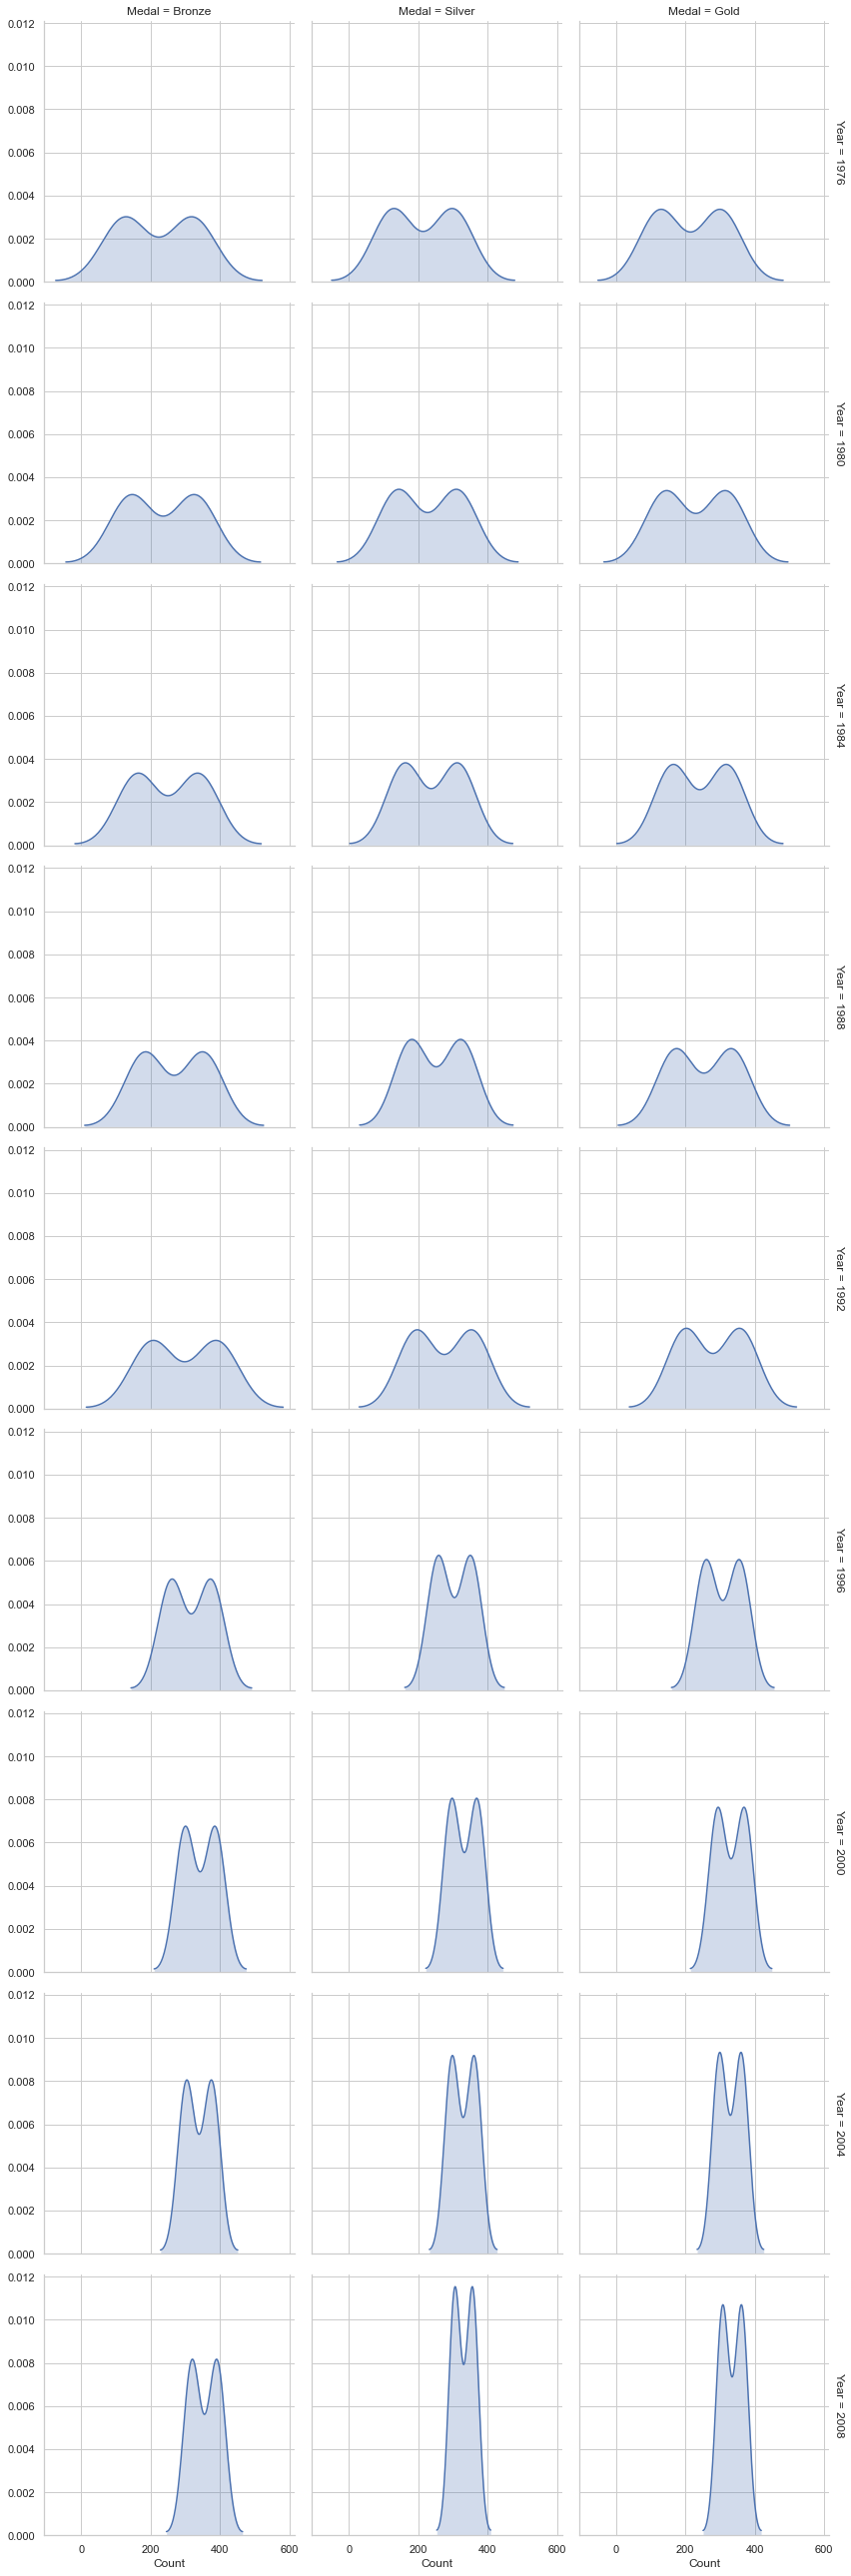

In [52]:
# facet the distribution of medal(bronze, silver, gold) awrded to athlete(women, men)
g = sb.FacetGrid(data=Gender_Medal, col='Medal', row='Year', margin_titles=True, height=4)
g.map(sb.kdeplot, 'Count', shade=True)

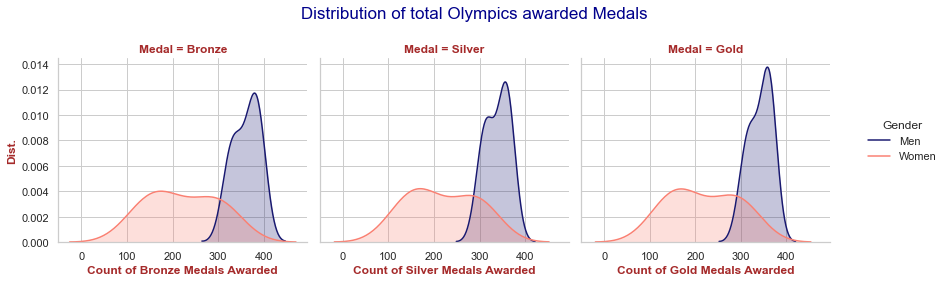

In [59]:
# facet the distribution of medal(bronze, silver, gold) awrded to athlete(women, men)
g = sb.FacetGrid(data=Gender_Medal, col='Medal', hue='Gender', palette=['midnightblue', 'salmon'], margin_titles=True, height=4)
g.map(sb.kdeplot, 'Count', shade=True)

g.add_legend()
g.fig.suptitle('Distribution of total Olympics awarded Medals', fontsize=17, color='darkblue')
g.fig.subplots_adjust(top=0.8)
g.set_titles(color = 'brown', fontweight='bold')

g.axes[0,0].set_ylabel('Dist.', fontweight='bold', color='brown')

g.axes[0,0].set_xlabel('Count of Bronze Medals Awarded', fontweight='bold', color='brown')
g.axes[0,1].set_xlabel('Count of Silver Medals Awarded', fontweight='bold', color='brown')
g.axes[0,2].set_xlabel('Count of Gold Medals Awarded', fontweight='bold', color='brown')
sb.set_style("whitegrid");

> By looking to this facet distribution, I can conclude that men awarded Gold medals more than Silver and Bronze. But in women case all medals are nearly the same.

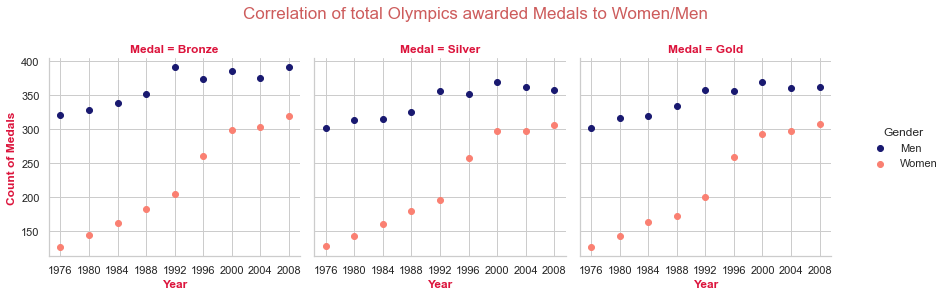

In [60]:
# facet the correlation of medal(bronze, silver, gold) awrded to athlete(women, men) through time
g = sb.FacetGrid(data=Gender_Medal, col='Medal', hue='Gender', palette=['midnightblue', 'salmon'], margin_titles=True, height=4)
g.map_dataframe(plt.scatter, x='Year', y='Count')


g.add_legend()
g.fig.suptitle('Correlation of total Olympics awarded Medals to Women/Men', fontsize=17, color='indianred')
g.fig.subplots_adjust(top=0.8)
g.set_titles(color = 'crimson', fontweight='bold')

g.axes[0,0].set_ylabel('Count of Medals', fontweight='bold', color='crimson')


g.axes[0,0].set_xlabel('Year', fontweight='bold', color='crimson')
g.axes[0,1].set_xlabel('Year', fontweight='bold', color='crimson')
g.axes[0,2].set_xlabel('Year', fontweight='bold', color='crimson')

sb.set_style("whitegrid");

> It's clear that women participation has very strong positive correlation with time.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Men awarded Gold medals more than Silver and Bronze. But in women case all medals are nearly the same.
### Were there any interesting or surprising interactions between features?

> It's clear that women participation has very strong positive correlation with time.